## Healthcare Data Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import datetime
from time import strftime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("patient_show.csv")

In [3]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,29 04 2016 19:38,29 04 2016 01:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,29 04 2016 17:08,29 04 2016 01:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,29 04 2016 17:19,29 04 2016 01:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,29 04 2016 18:29,29 04 2016 01:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,29 04 2016 17:07,29 04 2016 01:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,3 05 2016 10:15,7 06 2016 01:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,3 05 2016 08:27,7 06 2016 01:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,27 04 2016 17:03,7 06 2016 01:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,27 04 2016 16:09,7 06 2016 01:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
data.shape

(110527, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# converting the ScheduledDay and AppointmentDay from object to datetime

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [8]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# getting the day of the week for the appointment day and scheduled day [Monday (0) to Sunday(6)]

data['sch_day'] = data['ScheduledDay'].dt.dayofweek
data['app_day'] = data['AppointmentDay'].dt.dayofweek

In [10]:
data['sch_day'].value_counts()

sch_day
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [11]:
data['app_day'].value_counts()

app_day
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

> For the scheduled day and the appointment day, there is no record of any activities on Sunday (6), the hospital allowed scheduling and appointment from monday to saturday

In [12]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_day', 'app_day'],
      dtype='object')

In [13]:
# Changing the incorrect columns name to the correct form

data = data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  sch_day         110527 non-null  int

In [15]:
data['Neighbourhood'].nunique()

81

In [16]:
#Dropping all unnecessary columns

data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

In [17]:
data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,sch_day,app_day
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMS_received    110527 non-null  int64         
 10  No-show         110527 non-null  object        
 11  sch_day         110527 non-null  int32         
 12  app_day         110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [19]:
data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sch_day,app_day
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


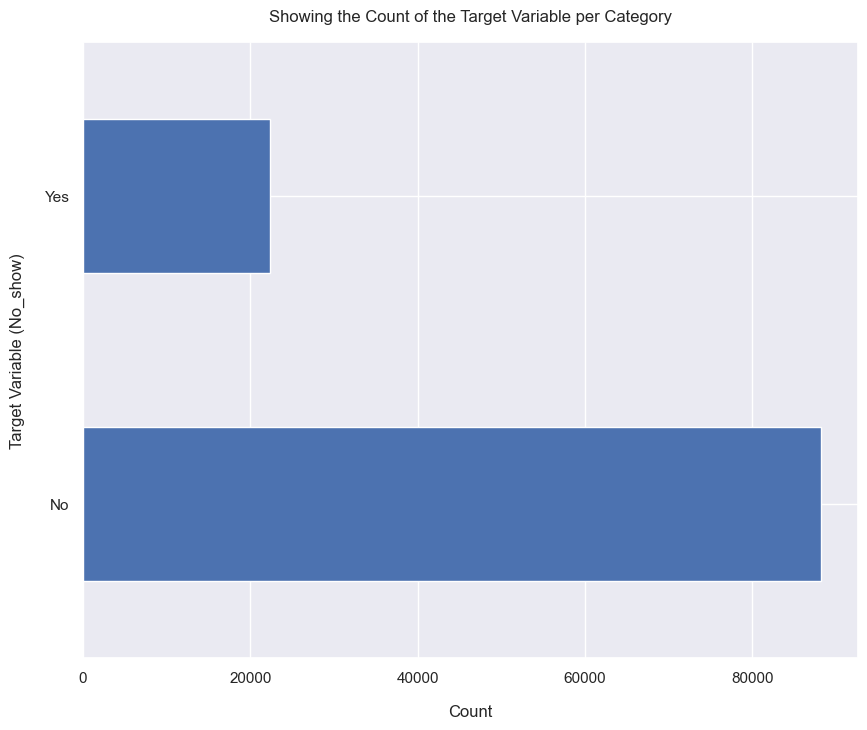

In [20]:
# Plotting the target variable

data['No-show'].value_counts().plot(kind = 'barh', figsize=(10,8))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable (No_show)", labelpad = 14)
plt.title("Showing the Count of the Target Variable per Category", y =1.02);

In [21]:
# Calculating the percentage of the appointment No show categories

(data['No-show'].value_counts()/len(data['No-show']))*100

No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [22]:
# Calculating the values for the No show categories

data['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

> It is highly unbalanced data, the number of people who show up for their appointment is much higher than the number of people who do not show up. The analysis will focus on the 20.193% of people, who did not show up for their appointments. 

In [23]:
# FInding out the number of missing values for each feature

data.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
sch_day           0
app_day           0
dtype: int64

> There is no missing value in the dataset

In [24]:
# getting the patient stay period in the hospital

In [25]:
# Creating a new data frame for processing and analysis 

newdata = data

In [26]:
newdata.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sch_day,app_day
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


> For the Age column, the min = -1 and max = 115

In [27]:
# Check out the rows with negative values

negative_rows = newdata[newdata['Age'] < 0]
print(negative_rows)

      Gender ScheduledDay AppointmentDay  Age  Scholarship  Hypertension  \
99832      F   2016-06-06     2016-06-06   -1            0             0   

       Diabetes  Alcoholism  Handicap  SMS_received No-show  sch_day  app_day  
99832         0           0         0             0      No        0        0  


In [28]:
# drop the row with the negative data

newdata = newdata[newdata['Age'] >= 0]

In [29]:
newdata.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sch_day,app_day
count,110526,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,2016-05-08 20:32:56.179360256,2016-05-19 00:57:35.968731392,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,1.851971,1.858260
min,2015-11-10 00:00:00,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,1.378515,1.371667


In [30]:
# Grouping the age in bins of 20 years

labels = ["{0} - {1}".format(i, i + 20) for i  in range (1, 118, 20)]
newdata['Age_group'] = pd.cut(newdata.Age, range(1, 130, 20), right=False, labels = labels)

In [31]:
newdata.drop(['Age'], axis = 1, inplace = True)

In [32]:
newdata

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,sch_day,app_day,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,No,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,No,4,4,41 - 61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,0,0,0,0,0,1,No,1,1,41 - 61
110523,F,2016-05-03,2016-06-07,0,0,0,0,0,1,No,1,1,41 - 61
110524,F,2016-04-27,2016-06-07,0,0,0,0,0,1,No,2,1,21 - 41
110525,F,2016-04-27,2016-06-07,0,0,0,0,0,1,No,2,1,21 - 41


In [33]:
newdata.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No-show', 'sch_day', 'app_day', 'Age_group'],
      dtype='object')

____________ Gender ____________
Gender
F    71839
M    38687
Name: count, dtype: int64
____________ ScheduledDay ____________
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
____________ AppointmentDay ____________
AppointmentDay
2016-06-06    4691
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
____________ Scho

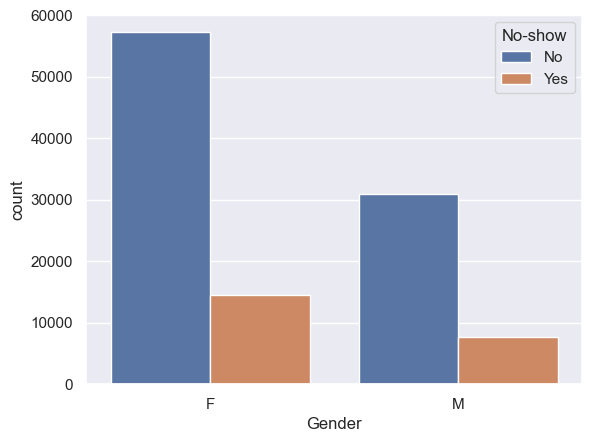

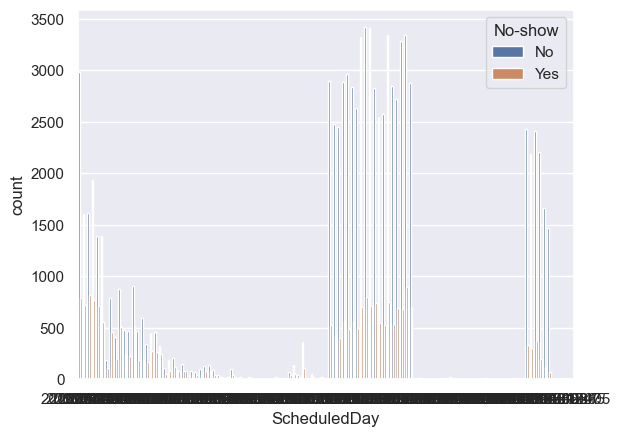

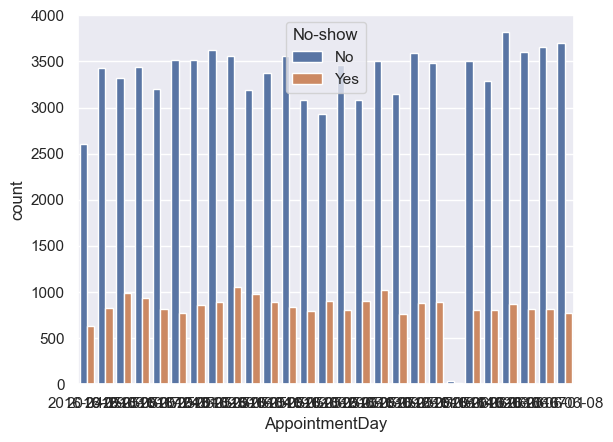

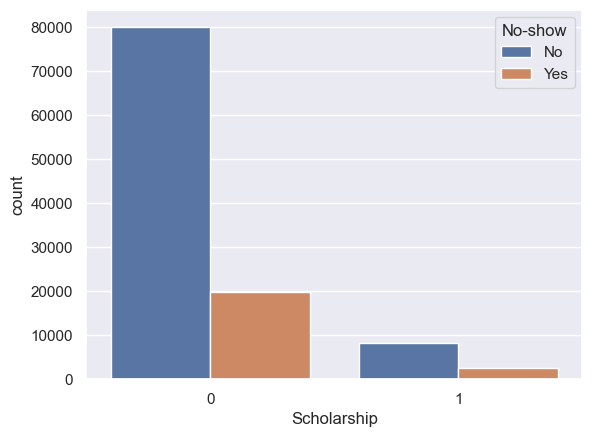

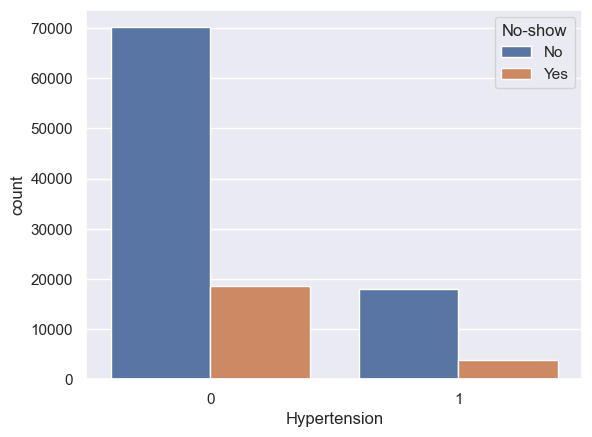

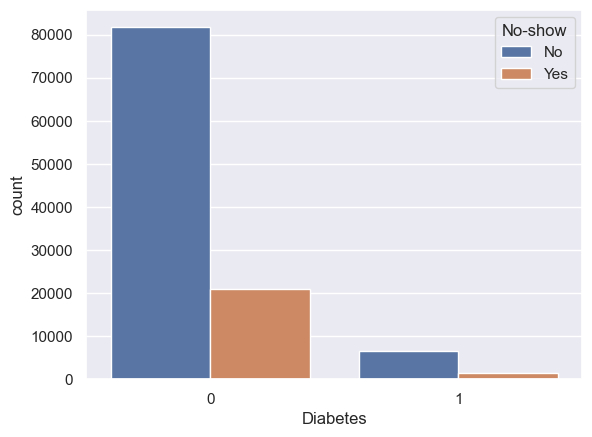

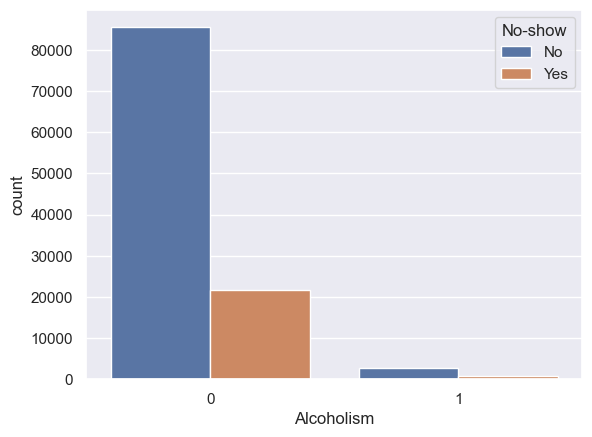

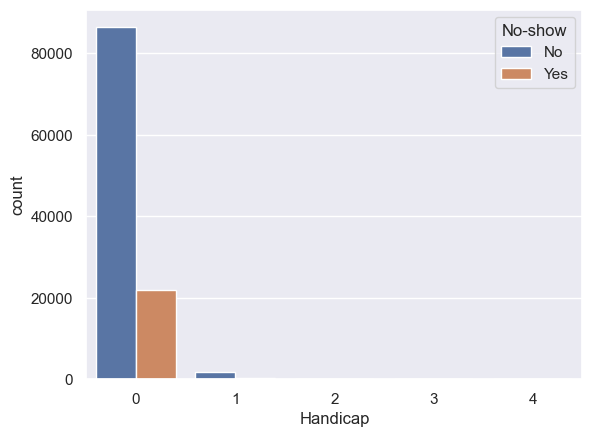

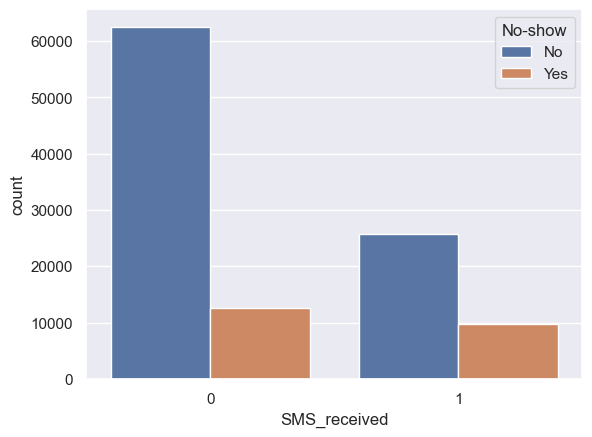

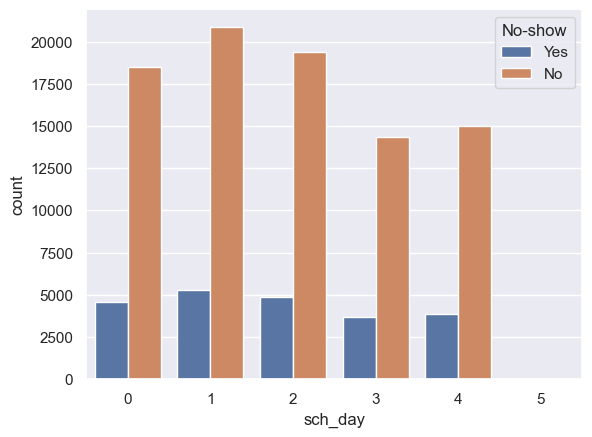

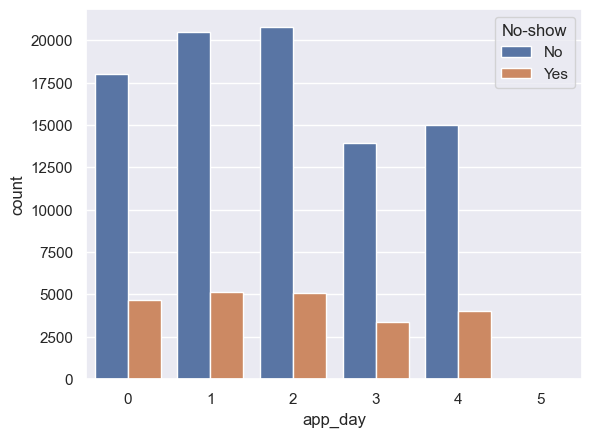

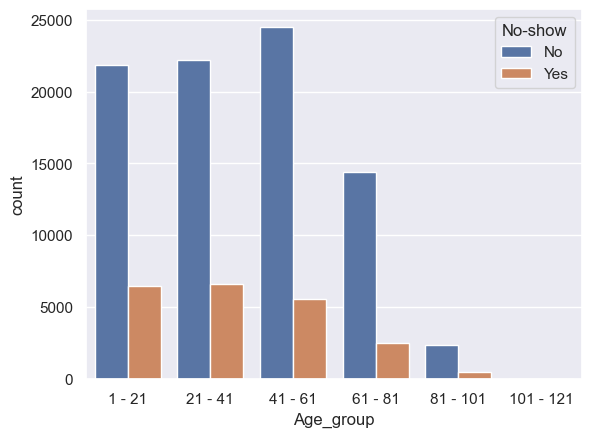

In [34]:
# Looking through the value counts for all the columns with respect to the No show column

for i, predictor in enumerate(newdata.drop(columns=['No-show'])):
    print('_'*12, predictor, '_'*12)
    print(newdata[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=newdata, x=predictor, hue='No-show')

In [35]:
newdata['No-show'] = np.where(newdata['No-show'] == 'Yes', 1, 0)

newdata['No-show'].value_counts()

No-show
0    88207
1    22319
Name: count, dtype: int64

In [36]:
# convert all categorical variables into dummy variables (encoding)

data_dumies = pd.get_dummies(newdata)
data_dumies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,sch_day,app_day,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

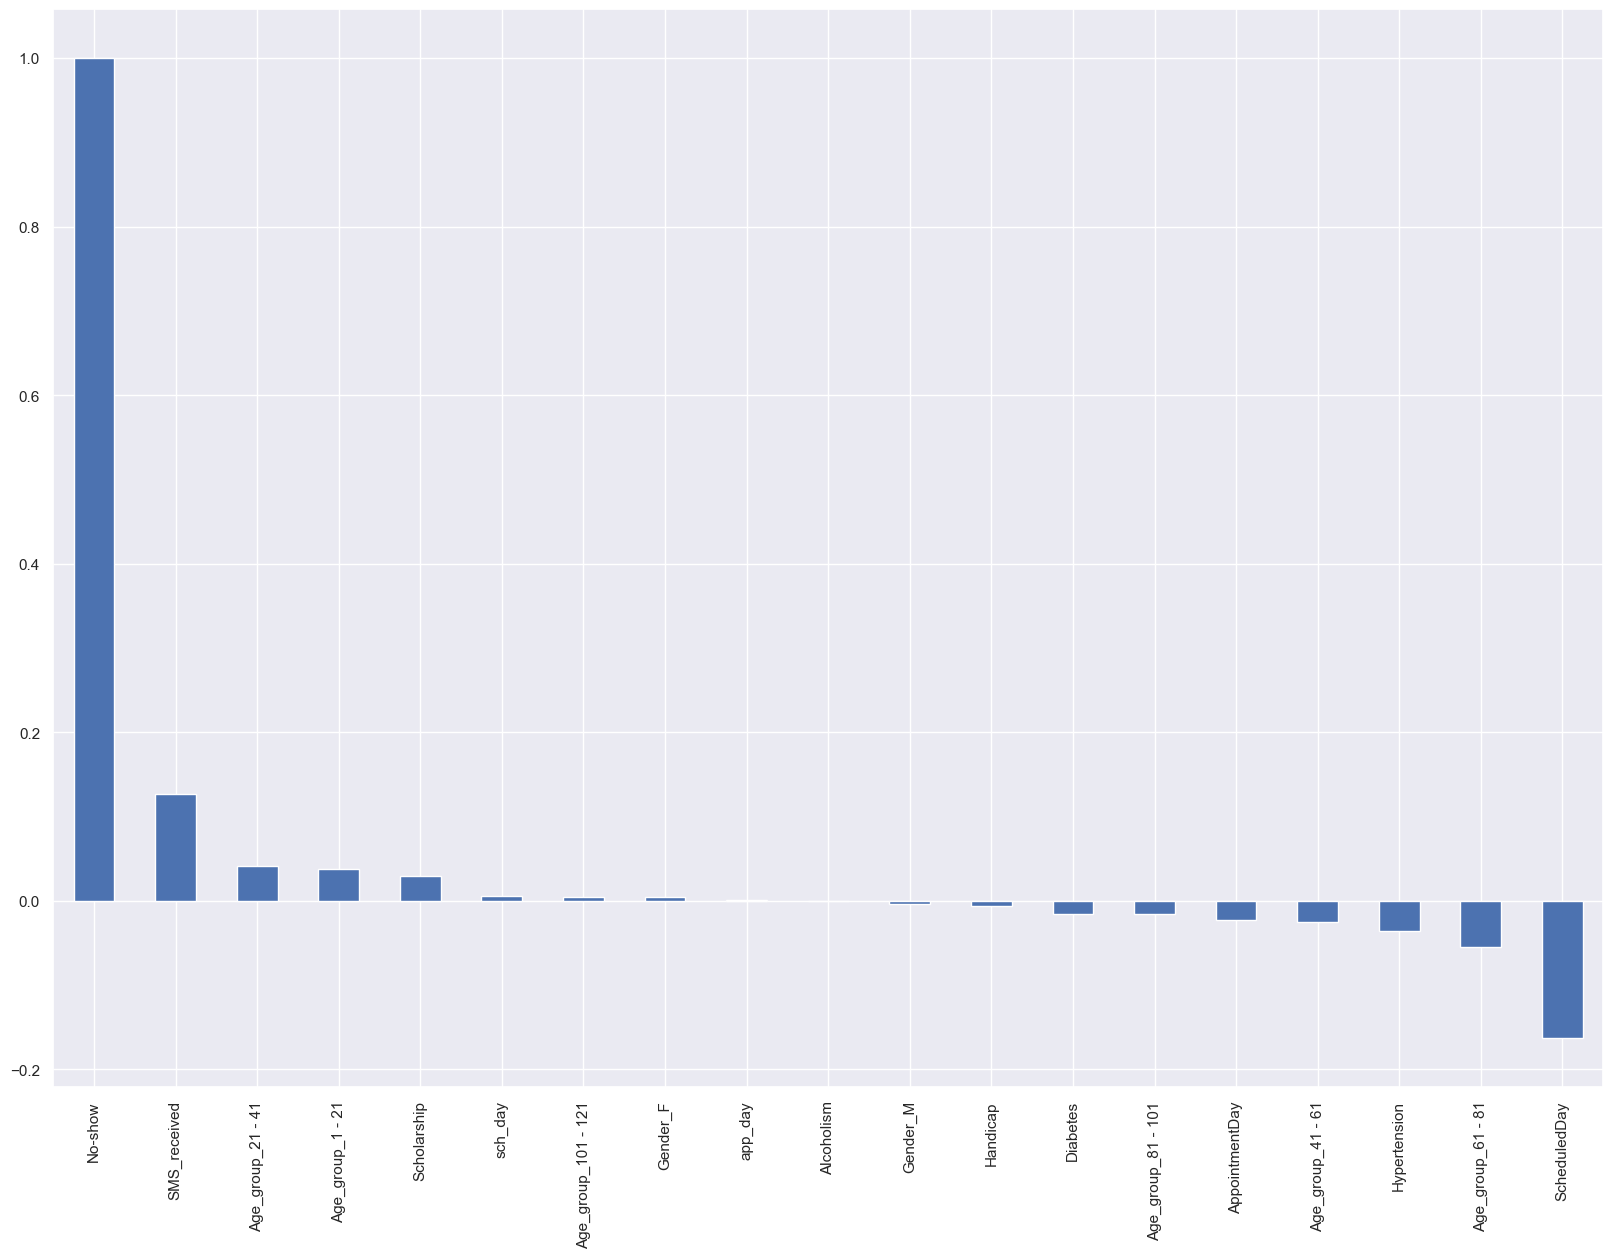

In [37]:
plt.figure(figsize=(20,14))
data_dumies.corr()['No-show'].sort_values(ascending=False).plot(kind='bar')

> SMS-received and Age group 21 to 41 show a high correlation to the Noshow column compared to the other columns

<Axes: >

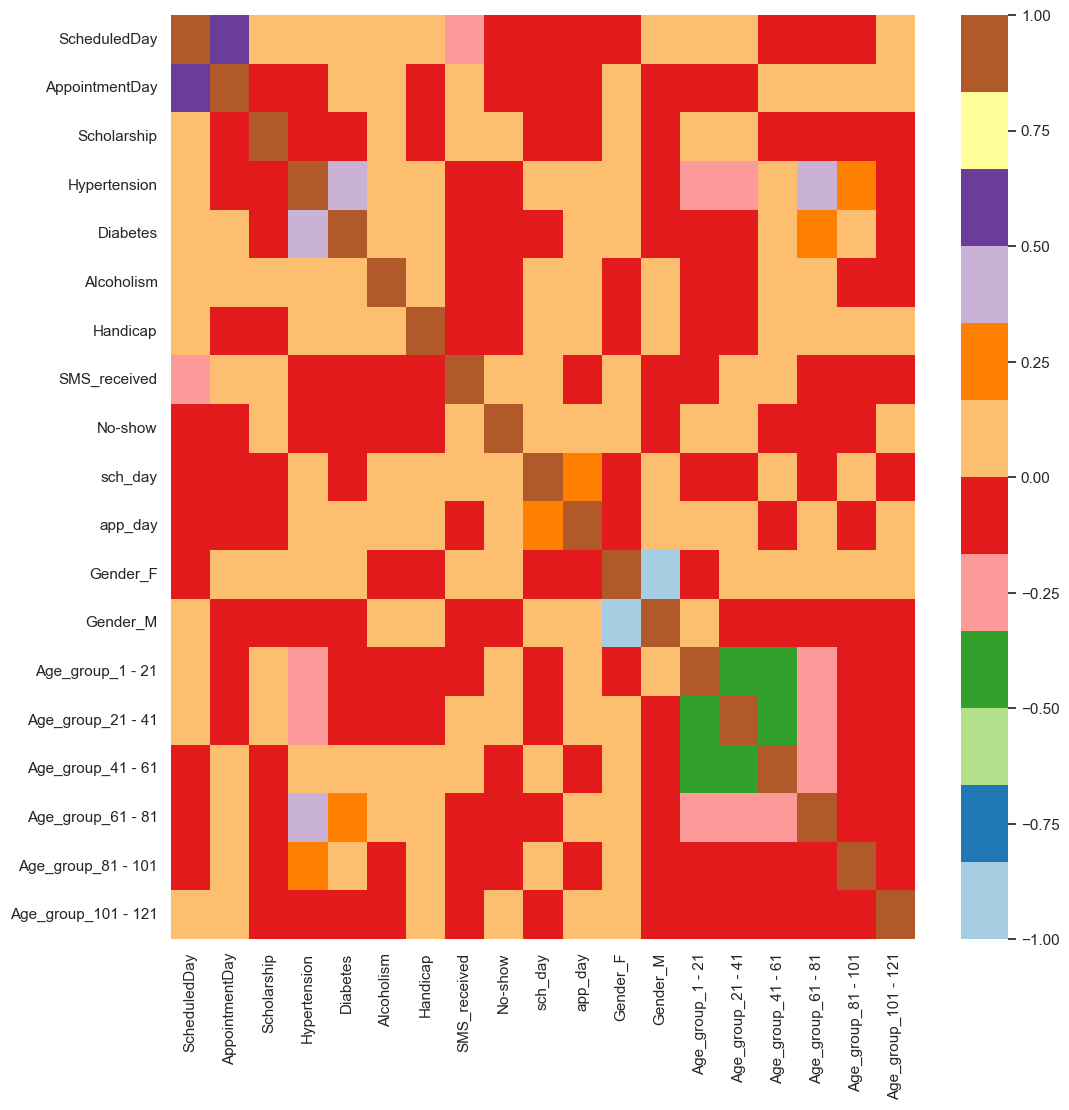

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dumies.corr(), cmap="Paired")

In [39]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Scholarship     110526 non-null  int64         
 4   Hypertension    110526 non-null  int64         
 5   Diabetes        110526 non-null  int64         
 6   Alcoholism      110526 non-null  int64         
 7   Handicap        110526 non-null  int64         
 8   SMS_received    110526 non-null  int64         
 9   No-show         110526 non-null  int32         
 10  sch_day         110526 non-null  int32         
 11  app_day         110526 non-null  int32         
 12  Age_group       106987 non-null  category      
dtypes: category(1), datetime64[ns](2), int32(3), int64(6), object(1)
memory usage: 9.8+ MB


In [40]:
data0 = newdata.loc[newdata['No-show']==0]
data1 = newdata.loc[newdata['No-show']==1]

In [41]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88207 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          88207 non-null  object        
 1   ScheduledDay    88207 non-null  datetime64[ns]
 2   AppointmentDay  88207 non-null  datetime64[ns]
 3   Scholarship     88207 non-null  int64         
 4   Hypertension    88207 non-null  int64         
 5   Diabetes        88207 non-null  int64         
 6   Alcoholism      88207 non-null  int64         
 7   Handicap        88207 non-null  int64         
 8   SMS_received    88207 non-null  int64         
 9   No-show         88207 non-null  int32         
 10  sch_day         88207 non-null  int32         
 11  app_day         88207 non-null  int32         
 12  Age_group       85307 non-null  category      
dtypes: category(1), datetime64[ns](2), int32(3), int64(6), object(1)
memory usage: 7.8+ MB


In [42]:
def uniplot(df, col, title, hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    #plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order = df[col].value_counts().index, hue=hue, palette='bright')

    plt.show()

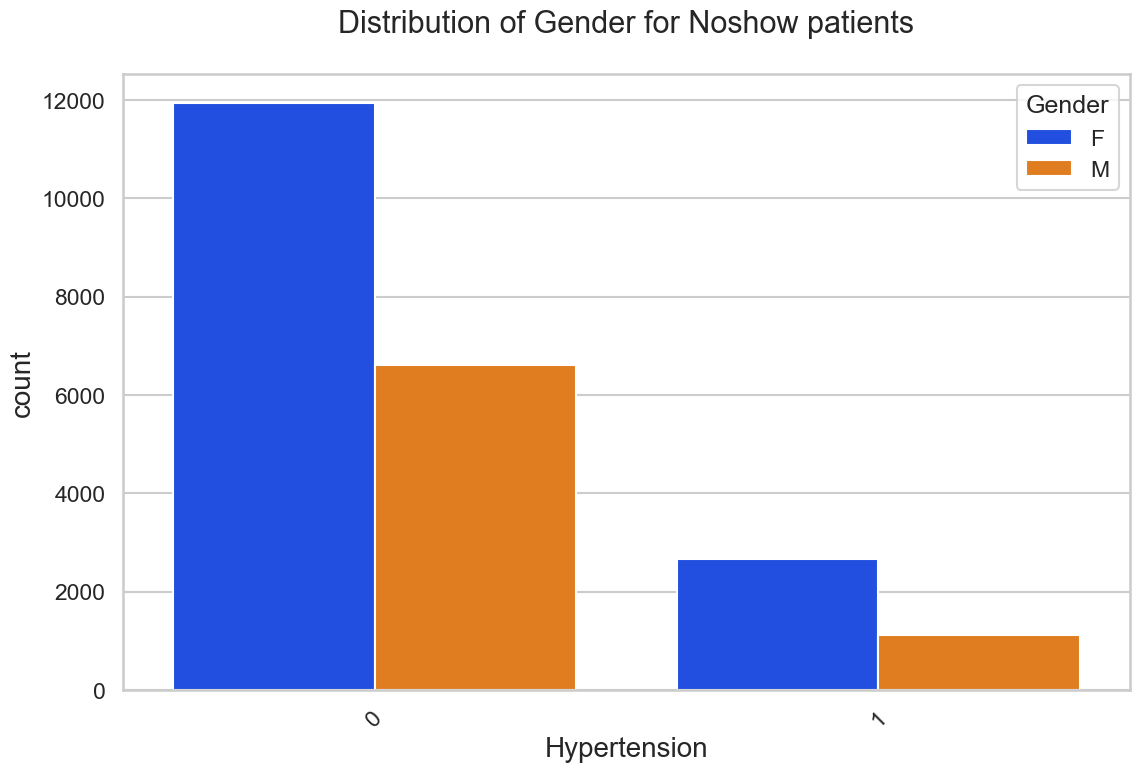

In [54]:
uniplot(df=data1, col='Hypertension', title='Distribution of Gender for Noshow patients', hue = 'Gender')

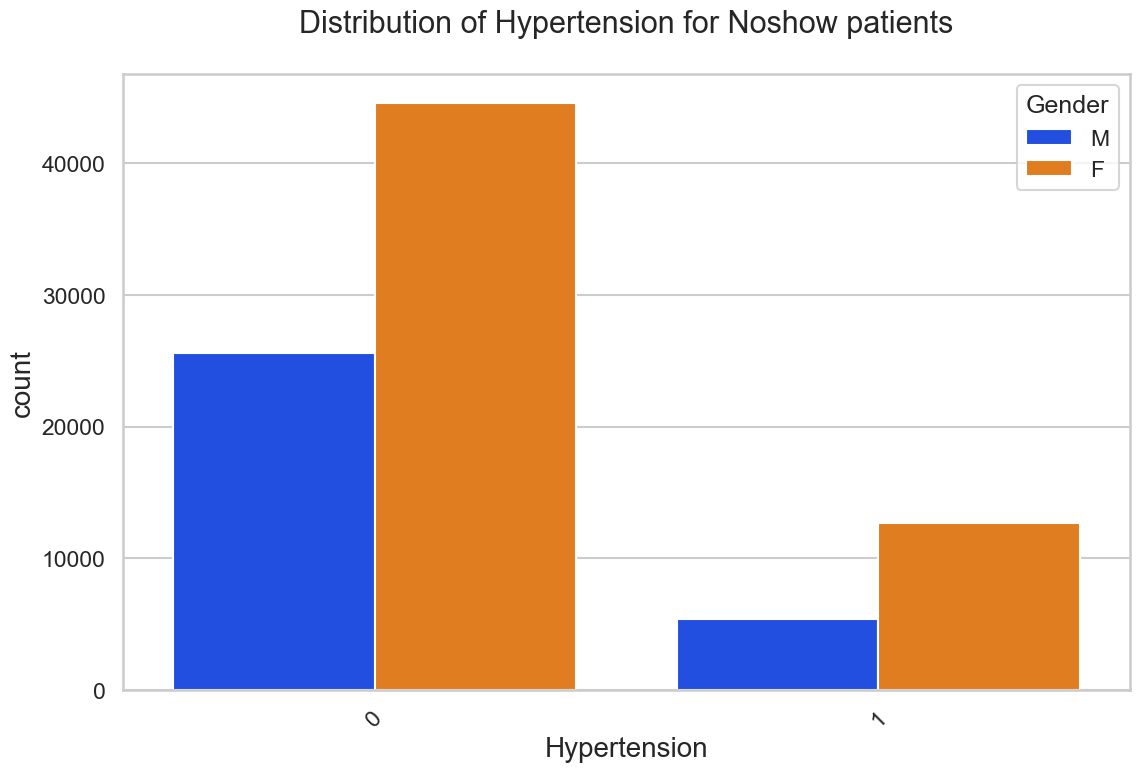

In [50]:
uniplot(data0, col='Hypertension', title='Distribution of Hypertension for Noshow patients', hue = 'Gender')

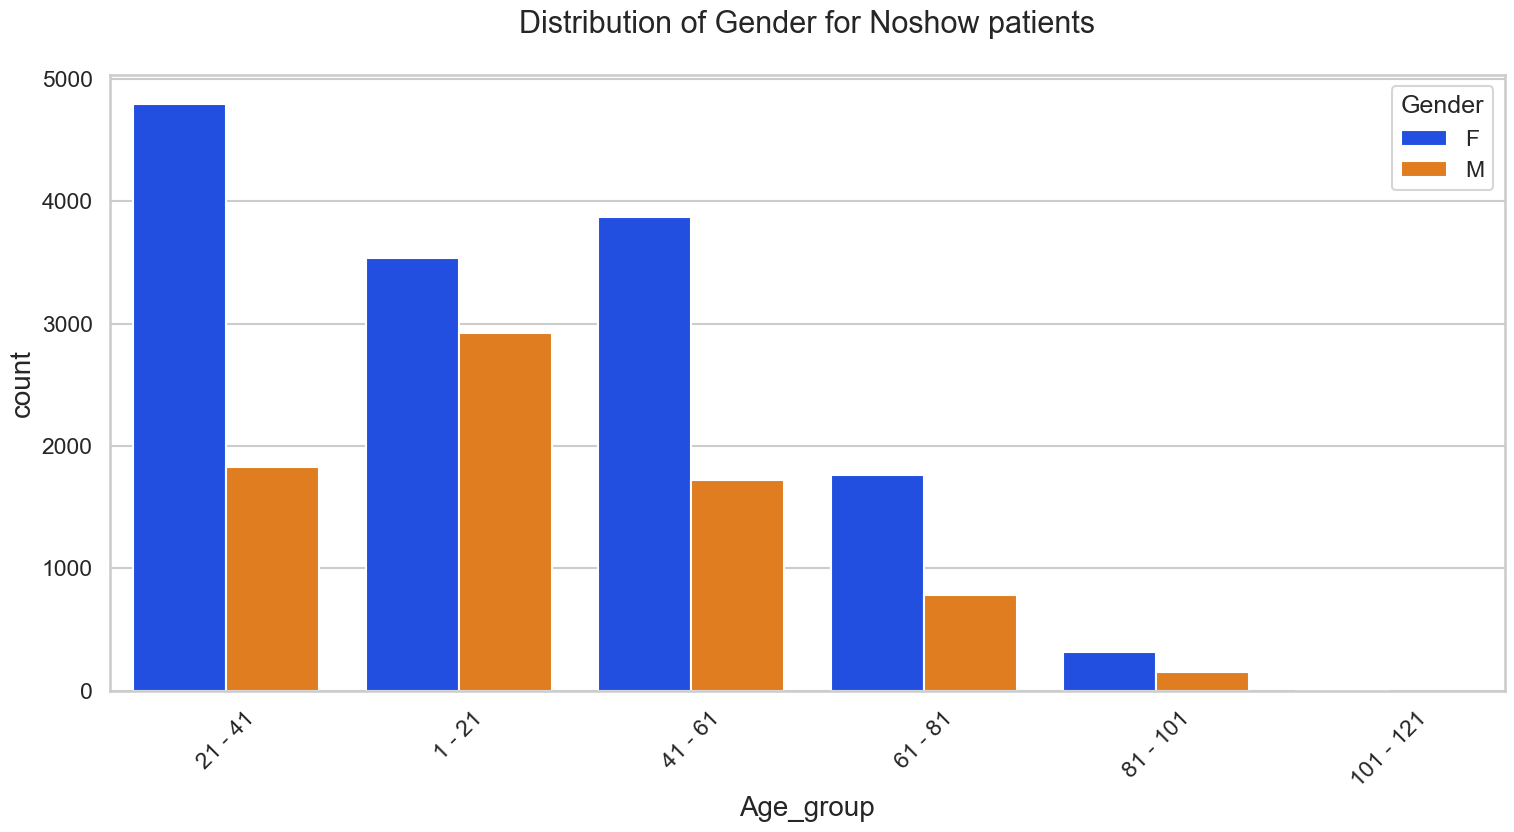

In [45]:
uniplot(data1, col='Age_group', title='Distribution of Gender for Noshow patients', hue = 'Gender')

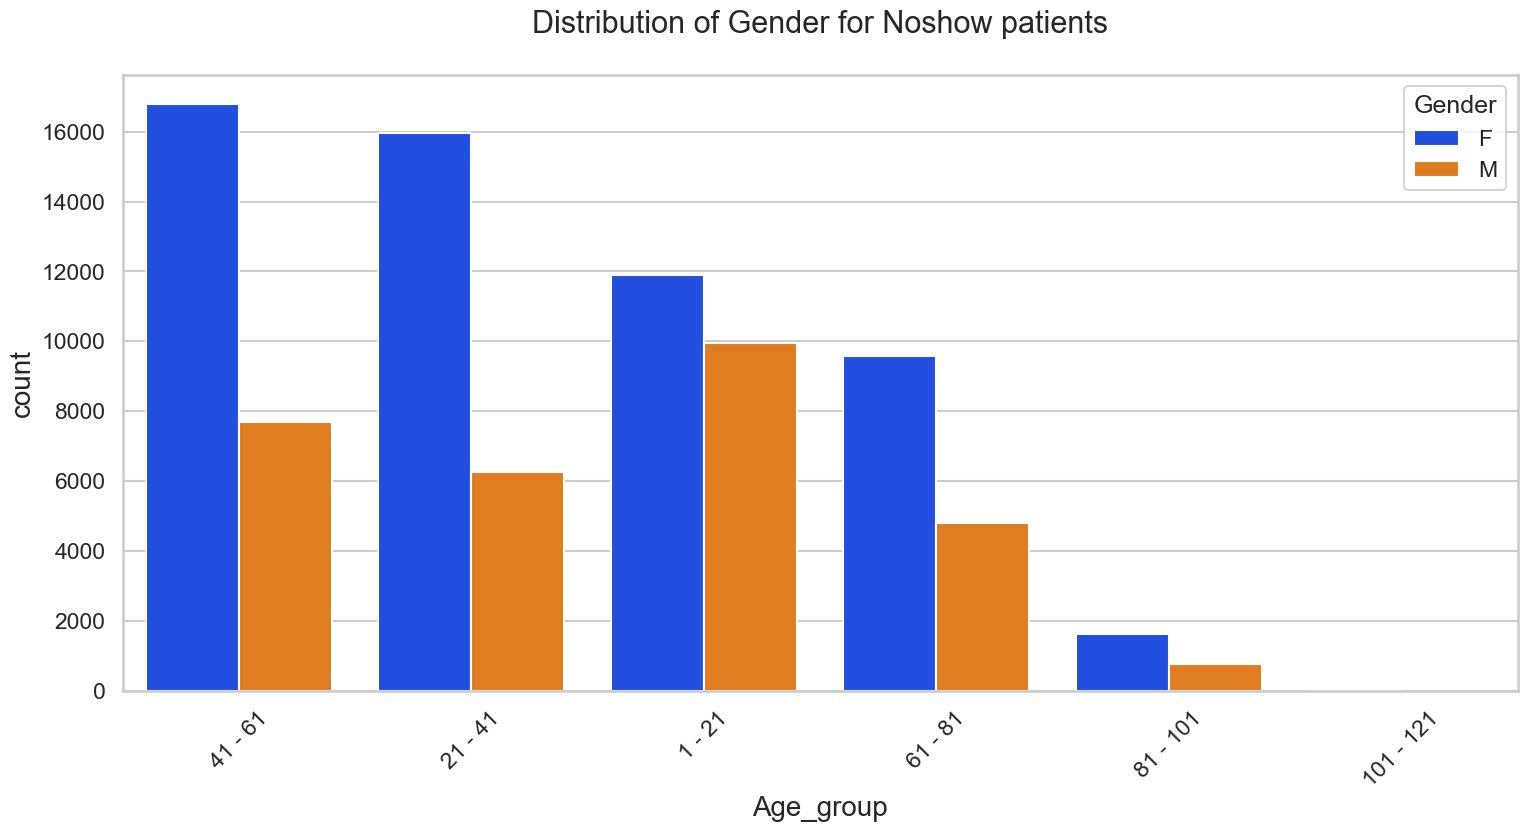

In [46]:
uniplot(data0, col='Age_group', title='Distribution of Gender for Noshow patients', hue = 'Gender')

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22319 entries, 6 to 110516
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          22319 non-null  object        
 1   ScheduledDay    22319 non-null  datetime64[ns]
 2   AppointmentDay  22319 non-null  datetime64[ns]
 3   Scholarship     22319 non-null  int64         
 4   Hypertension    22319 non-null  int64         
 5   Diabetes        22319 non-null  int64         
 6   Alcoholism      22319 non-null  int64         
 7   Handicap        22319 non-null  int64         
 8   SMS_received    22319 non-null  int64         
 9   No-show         22319 non-null  int32         
 10  sch_day         22319 non-null  int32         
 11  app_day         22319 non-null  int32         
 12  Age_group       21680 non-null  category      
dtypes: category(1), datetime64[ns](2), int32(3), int64(6), object(1)
memory usage: 2.0+ MB


____________ Gender ____________
Gender
F    14594
M     7725
Name: count, dtype: int64
____________ ScheduledDay ____________
ScheduledDay
2016-05-03    893
2016-04-26    815
2016-05-02    799
2016-04-29    792
2016-04-28    774
             ... 
2016-01-04      1
2015-12-03      1
2016-01-26      1
2016-02-04      1
2015-12-14      1
Name: count, Length: 94, dtype: int64
____________ AppointmentDay ____________
AppointmentDay
2016-05-16    1049
2016-05-09    1019
2016-05-10     992
2016-05-04     973
2016-05-17     935
2016-05-13     905
2016-05-20     899
2016-05-19     892
2016-05-18     890
2016-05-30     888
2016-05-11     885
2016-06-06     873
2016-05-02     861
2016-05-12     837
2016-05-03     831
2016-06-07     816
2016-06-01     812
2016-05-24     811
2016-05-05     807
2016-06-03     805
2016-06-02     802
2016-05-06     795
2016-06-08     774
2016-05-31     767
2016-05-25     759
2016-04-29     633
2016-05-14       9
Name: count, dtype: int64
____________ Scholarship ____

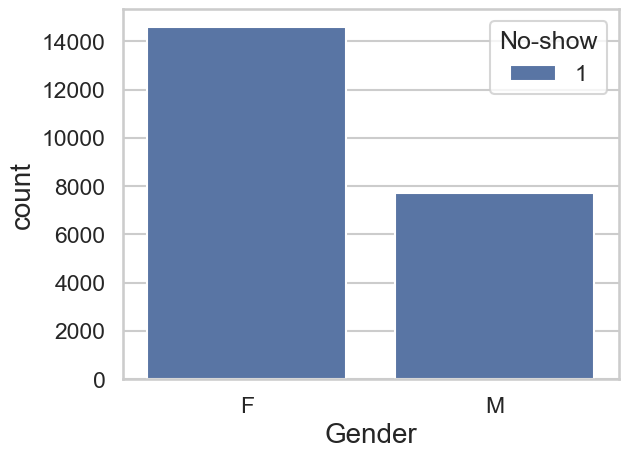

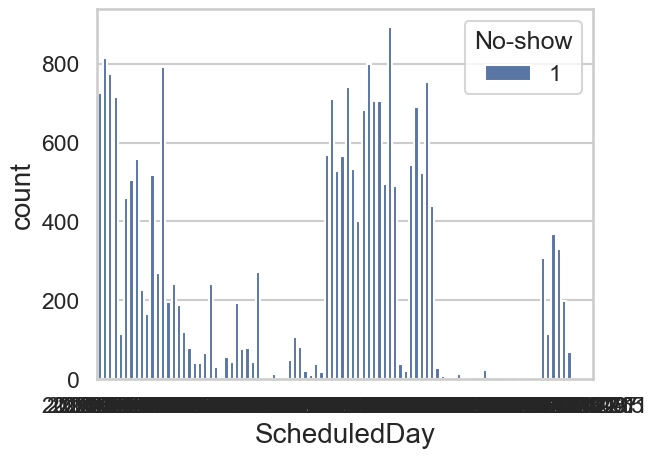

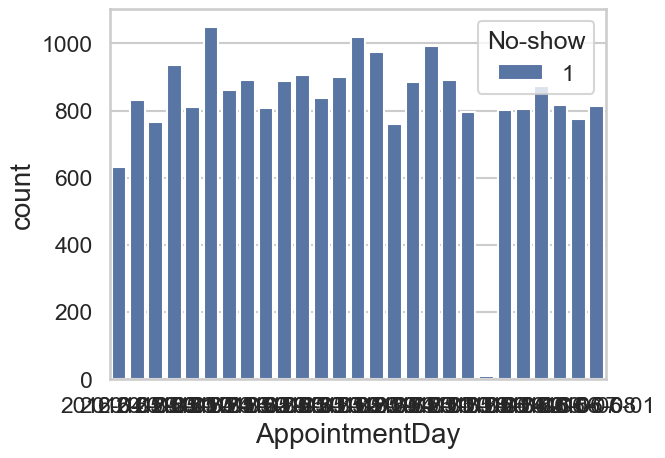

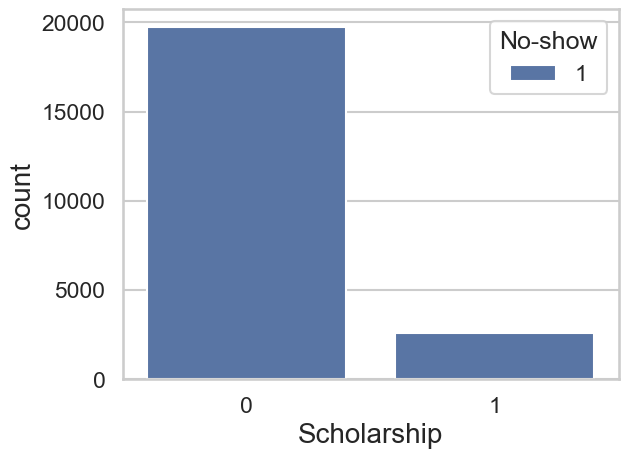

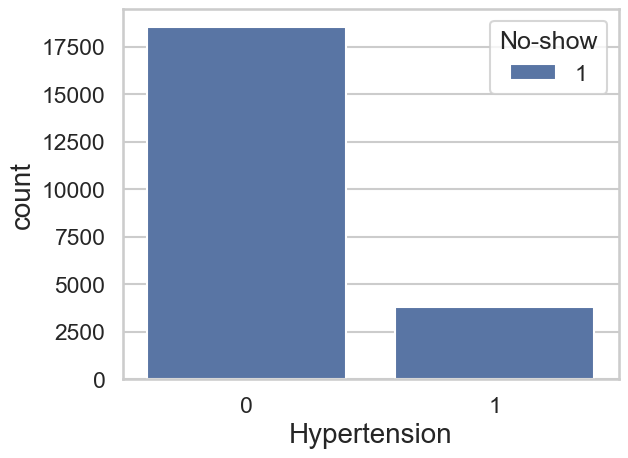

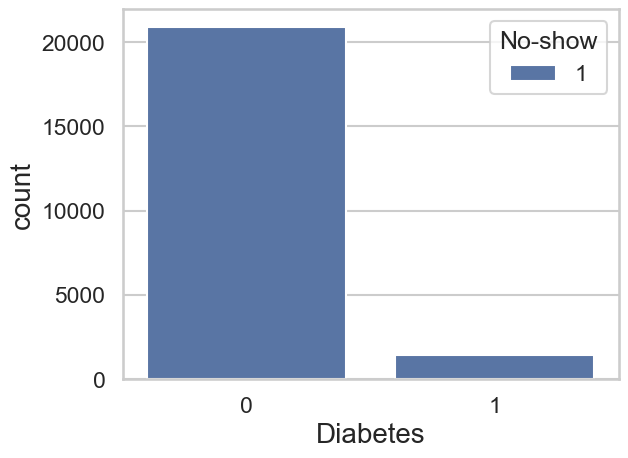

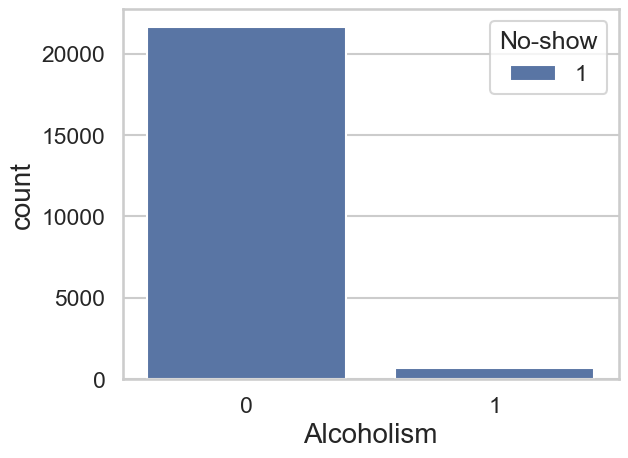

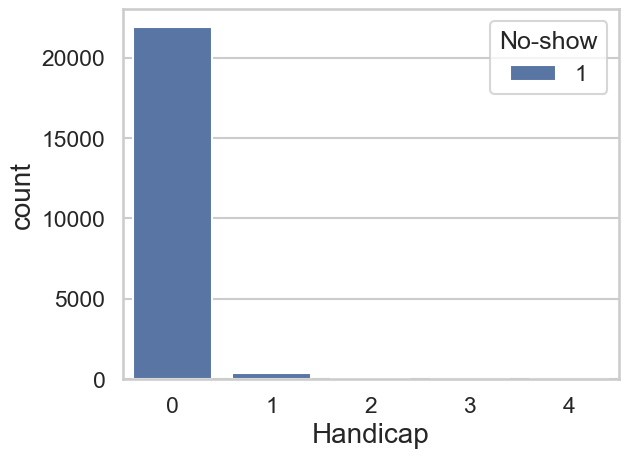

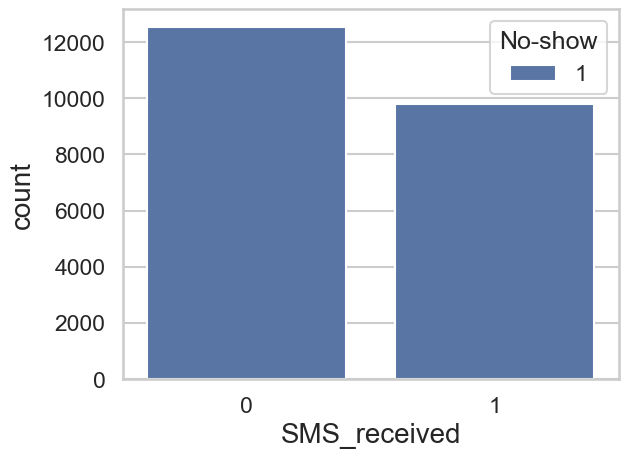

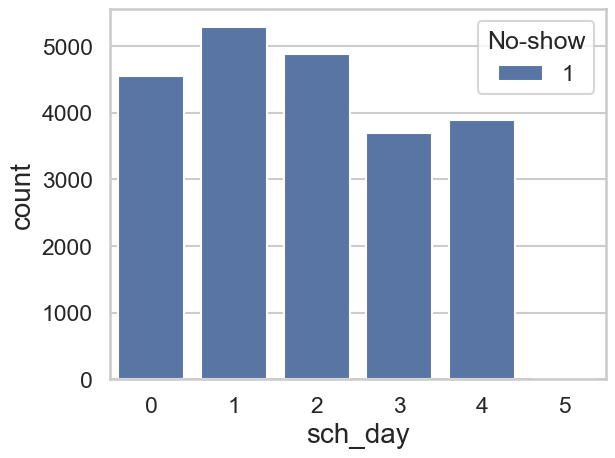

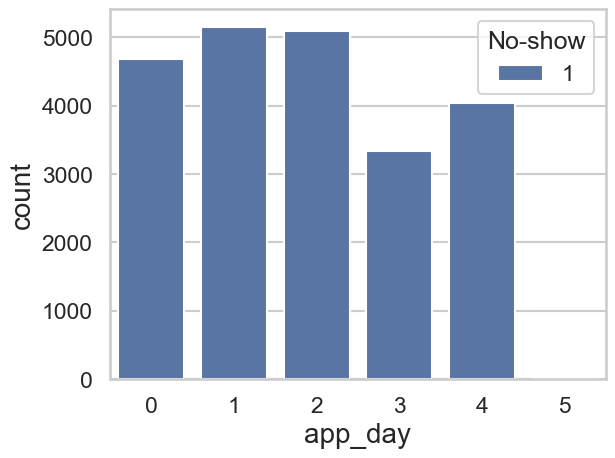

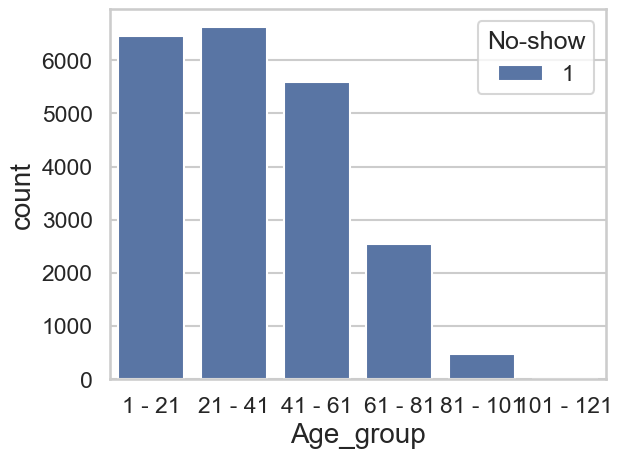

In [56]:
for i, predictor in enumerate(data1.drop(columns=['No-show'])):
    print('_'*12, predictor, '_'*12)
    print(data1[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=data1, x=predictor, hue='No-show')

## Insights gotten

### Focus: The number of people that do not show up for their appointment.
1. The Female patients have taken more appointments than male patients
2. The ratio of No show patient and show patient is almost equal for Age group except for age 0 and 1 with 80% show rate for each age group
3. There are 99666 patients without scholarship and out of them around 80% have come for the visit and out of the 10861 patients with scholarship around 75% of them have come for the visit.
4. Out of 21680 patients that did not come for appointment, only 2578 patients (11.55%) have scholarship and the rest do not. 
5. There is no appointment on sunday and very few appointment on saturday compare to other days of the week.
6. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them come for the visit.
